# Application: The Capital Asset Pricing Model (CAPM)

CAPM remains one of the workhorse statistical models in finance.  It is so common that sites like Yahoo!Finance report the measures we will estimate statistically.  

I use CAPM for a reason: absent experimental data, it is the only application of the bivariate linear model that I believe has validity in the real world.

The upshot of the CAPM says that we can directly interpret the intercept and slope coefficients as real-world measures relating the excess (or risk-adjusted) returns of a particular stock to those of a basket of stocks, such as a specific market.

## CAPM as a Bivariate Linear Model

Let $r_i$ denote the rate of return to asset $i$, $r_f$ denote the known rate of return on a risk-free asset (for example, short-term US government debt), and $r_m$ denote the rate of return to a portfolio (or a market) that includes $i$.  

The following equation can be derived:

$E(r_i)-r_f = \alpha + \beta \cdot (E(r_m)-r_f)$

Here, $E(\cdot)$ denotes an expected value (because this is a forward-looking prediction).  In CAPM, $\beta$ captures the sensitivity of an asset’s returns to the returns to a portfolio or to the market on which an asset trades.  In other words, it non-diversifiable risk.  In addition, $\alpha$ measures an asset $i$’s excess (or abnormal) returns.

Phrases you may have heard: 

1. The stock's beta is high
2. The hedge fund is chasing alpha

Formally, we can express our conjecture as a joint hypothesis:

$H_0: \alpha = 0, \beta=1$

$H_1: \text{ not }H_0$

Populating the interactive namespace from numpy and matplotlib


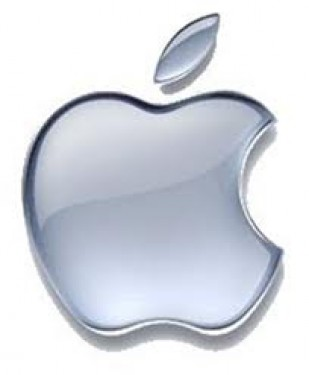

In [1]:
# Everyone's favority stock.

%pylab inline
from IPython.display import Image
Image(filename='G:/GX 5004.01/Session 1/apple27-e1352903320170.jpg') 

In [2]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas.io.data as web
import Quandl
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot
import patsy
import seaborn as sns
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Grab 10 years of Apple and NASDAQ data using Quandl.  You can also you pandas.io.data to grab from sites like Yahoo!Finance.
# Apple trades internationally on the NASDAQ OMX.  

aapl_all = Quandl.get("YAHOO/AAPL", trim_start="2005-1-1")
nasdaq_all = Quandl.get("NASDAQOMX/COMP", trim_start="2005-1-1")
aapl = aapl_all['Adjusted Close']
nasdaq = nasdaq_all['Index Value']

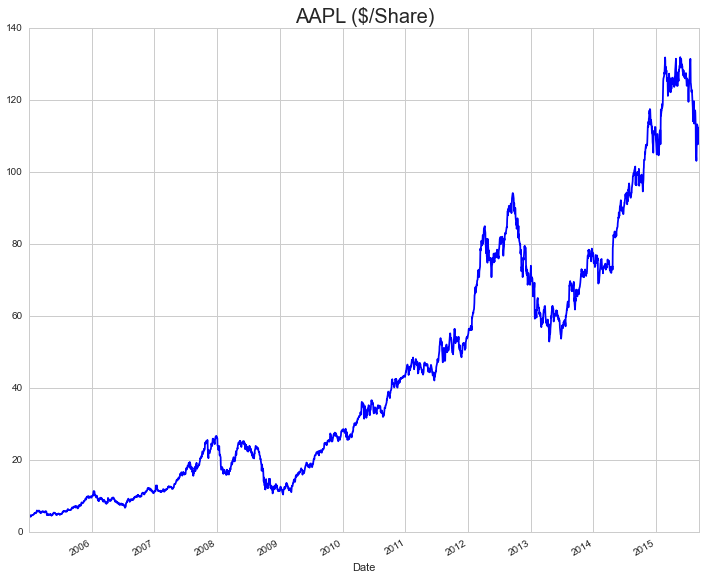

In [4]:
plt.figure(figsize = (12,10))
#plt.plot(aapl)
aapl.plot(color='blue')
plt.title('AAPL ($/Share)', fontsize=20)

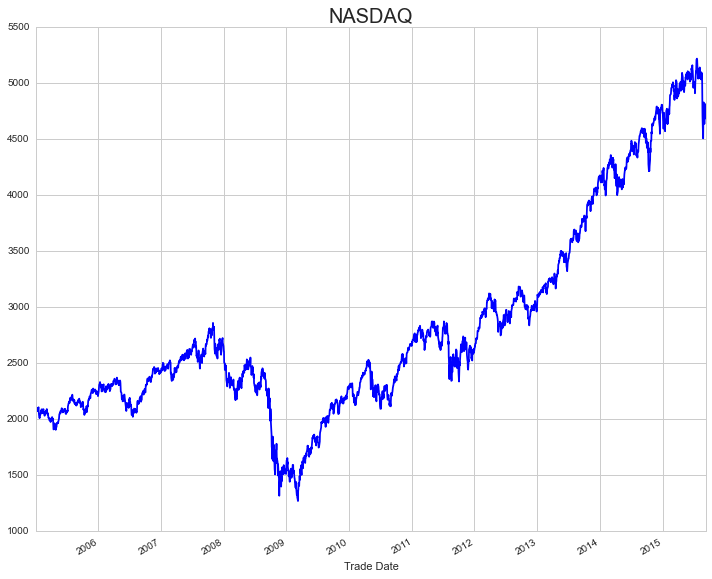

In [5]:
plt.figure(figsize = (12,10))
#plt.plot(nasdaq)
nasdaq.plot(color='blue')
plt.title('NASDAQ', fontsize=20)

In [6]:
# For our purposes, let's limit to the last five years.

aapl_all = Quandl.get("YAHOO/AAPL", trim_start="2010-1-1")
nasdaq_all = Quandl.get("NASDAQOMX/COMP", trim_start="2010-1-1")
aapl = aapl_all['Adjusted Close']
nasdaq = nasdaq_all['Index Value']

In [7]:
# Calculate log returns, which is the standard finance measure for daily returns in finance.

aapl_returns = np.log(aapl / aapl.shift(1))
nasdaq_returns = np.log(nasdaq / nasdaq.shift(1))
aapl_returns = aapl_returns.dropna()
nasdaq_returns = nasdaq_returns.dropna()

In [8]:
print aapl_returns.mean(), aapl_returns.std()

0.000957489067176 0.0168760314515


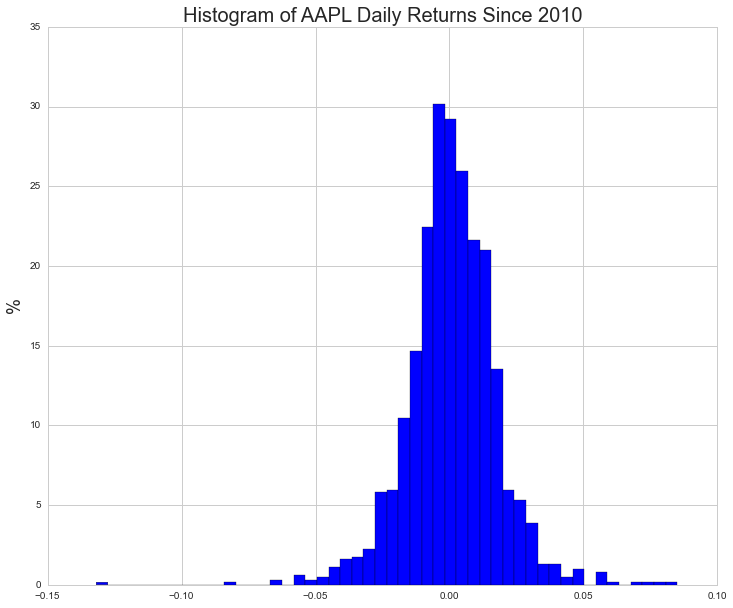

In [9]:
plt.figure(figsize= (12,10))
plt.hist(aapl_returns, bins=50, normed=True, color='blue')
plt.title('Histogram of AAPL Daily Returns Since 2010', fontsize=20)
plt.ylabel('%', fontsize=18)

In [10]:
print nasdaq_returns.mean(), nasdaq_returns.std()

0.000514020254173 0.011202478983


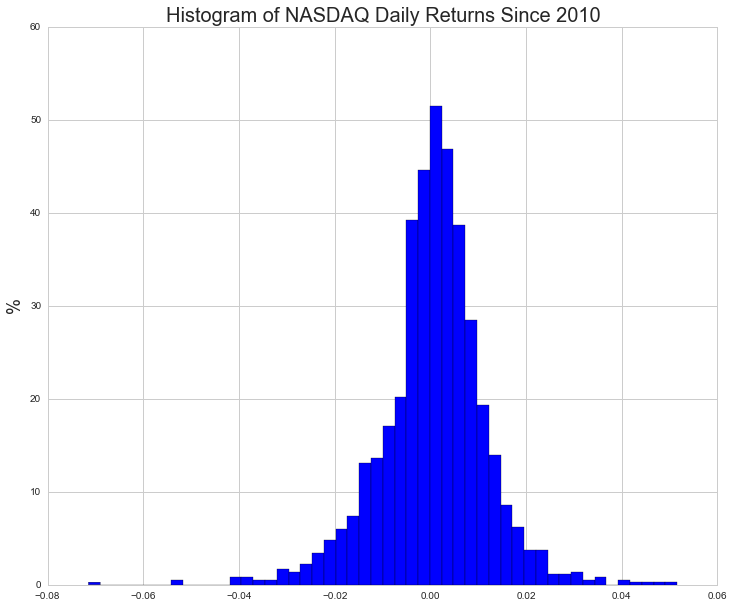

In [11]:
plt.figure(figsize= (12,10))
plt.hist(nasdaq_returns, bins=50, normed=True, color='blue')
plt.title('Histogram of NASDAQ Daily Returns Since 2010', fontsize=20)
plt.ylabel('%', fontsize=18)

In [12]:
# Create dataframes for merge and regression.

aapl_returns = pd.DataFrame(aapl_returns)
nasdaq_returns = pd.DataFrame(nasdaq_returns)

In [13]:
# Confirm dataframes

aapl_returns.info()
nasdaq_returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1429 entries, 2010-01-05 to 2015-09-08
Data columns (total 1 columns):
Adjusted Close    1429 non-null float64
dtypes: float64(1)
memory usage: 22.3 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1429 entries, 2010-01-05 to 2015-09-08
Data columns (total 1 columns):
Index Value    1429 non-null float64
dtypes: float64(1)
memory usage: 22.3 KB


(-0.1, 0.1)

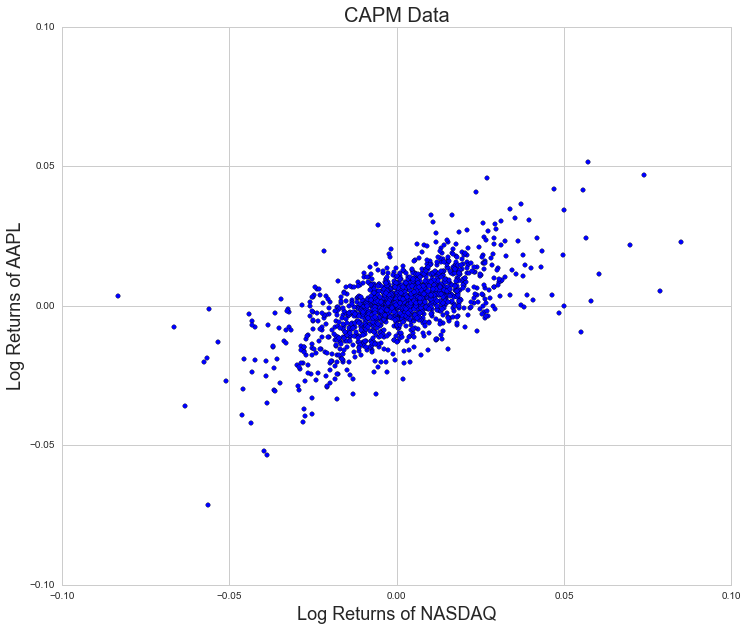

In [14]:
plt.figure(figsize = (12,10))
plt.scatter(aapl_returns, nasdaq_returns)
plt.title('CAPM Data', fontsize = 20)
plt.xlabel('Log Returns of NASDAQ', fontsize = 18)
plt.ylabel('Log Returns of AAPL', fontsize = 18)
plt.xlim([-0.1, 0.1])
plt.ylim([-0.1, 0.1])

In [15]:
# Merge and rename.

data = pd.merge(nasdaq_returns, aapl_returns, left_index=True, right_index=True)
data.rename(columns={'Index Value':'nasdaq', 'Adjusted Close':'aapl'}, inplace=True)

In [16]:
# Confirm summary stats

print data.mean()
print data.std()

nasdaq    0.000514
aapl      0.000957
dtype: float64
nasdaq    0.011202
aapl      0.016876
dtype: float64


In [17]:
# Use StatsModels Formula, which emulates R formula style.
# Run CAPM and review results.

mod = smf.ols(formula='aapl ~ nasdaq', data = data).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                   aapl   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     950.9
Date:                Wed, 09 Sep 2015   Prob (F-statistic):          1.98e-160
Time:                        12:30:05   Log-Likelihood:                 4170.7
No. Observations:                1429   AIC:                            -8337.
Df Residuals:                    1427   BIC:                            -8327.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0005      0.000      1.351      0.1

(-0.1, 0.1)

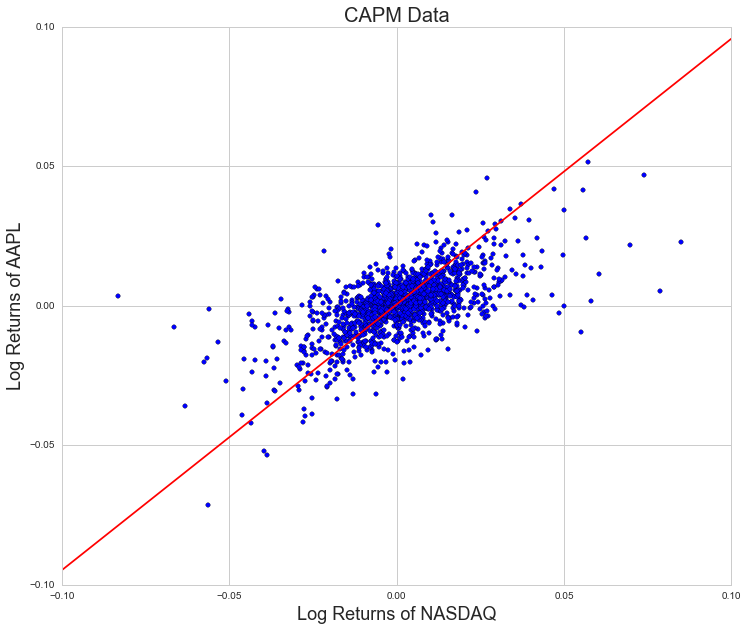

In [18]:
# This a convoluted

figure, ax = plt.subplots(figsize=(12,10))
ax.scatter(aapl_returns, nasdaq_returns)
mod = smf.ols(formula='aapl ~ nasdaq', data = data).fit()
abline_plot(model_results=mod, ax=ax, color='red')

ax.set_title('CAPM Data', fontsize = 20)
ax.set_ylabel('Log Returns of AAPL', fontsize = 18)
ax.set_xlabel('Log Returns of NASDAQ', fontsize = 18)
ax.set_xlim([-0.1, 0.1])
ax.set_ylim([-0.1, 0.1])

In [19]:
print mod.f_test("nasdaq = 1")

<F test: F=array([[ 2.35203685]]), p=0.125341092893, df_denom=1427, df_num=1>


In [20]:
print mod.f_test("Intercept = 0")

<F test: F=array([[ 1.82472067]]), p=0.176966539359, df_denom=1427, df_num=1>


In [21]:
print mod.f_test("nasdaq = 1, Intercept = 0")

<F test: F=array([[ 1.9975878]]), p=0.136041311055, df_denom=1427, df_num=2>
